<div style="background-color:black; padding:10px;">
    <h2 style="color: red; font-size: 40px; font-weight: bold">📊 Credit Score Prediction and Analysis</h2>
    <p style="font-size: 20px;">In this notebook, we will preprocess the data, apply advanced machine learning techniques like XGBRegressor, and optimize model performance for predicting credit scores</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.inspection import PartialDependenceDisplay
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

<div style="background-color:blue; padding:10px;">
    <h3 style="color: white; font-size: 25px; font-weight: bold">🗃️ Loading and Fetching the Data</h3>
    <p style="font-size: 20px">In this section, we take input data from our dataset, load the dataset and perform an initial exploration to understand its structure and content.</p>
</div>

In [3]:
# Load the dataset
data = pd.read_csv('/Users/rakshitrane/Downloads/credit_score.csv')

# Display the first few rows of the dataset
data.head()


,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


<div style="background-color:green; padding:10px;">
    <h3 style="font-size: 25px; font-weight: bold;">Data Preprocessing and Feature Scaling</h3>
    <p style="font-size: 20px;">We will preprocess the data by handling missing values, encoding categorical variables, and we will scale certain features to an optimum value.</p>
</div>

In [4]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_features = ['CAT_GAMBLING', 'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT', 'CAT_DEPENDENTS']

for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Feature Scaling
scaler = StandardScaler()
numerical_features = ['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME', 'R_DEBT_SAVINGS']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the updated dataset
data.head()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,-0.777240,-0.933351,-0.263339,-1.024549,1.699167,-0.278144,1889,945,0.5003,...,0.0000,0.0625,0,1,0,0,0,0,444,1
1,C02OZKC0ZF,-0.391097,-0.727370,-0.484123,-0.726575,-0.338334,-0.143371,5818,111,0.0191,...,0.7692,0.2222,2,1,0,0,1,0,625,0
2,C03FHP2D0A,-0.797934,-0.884465,-0.260730,-0.848054,1.921581,1.123182,1157,860,0.7433,...,1.4286,0.0578,0,1,0,0,1,0,469,1
3,C03PVPPHOY,-0.360312,-0.787594,-0.164673,-0.822840,0.296247,0.231386,6857,3686,0.5376,...,1.2500,0.1282,0,1,0,0,1,0,559,0
4,C04J69MUX0,0.249525,1.715197,1.639472,0.946701,1.699167,-0.227697,1978,322,0.1628,...,0.1163,0.0568,0,1,1,1,1,1,473,0


<div style="background-color:purple; padding:10px;">
    <h3 style="font-size: 25px; font-weight: bold;">Training Data and Test Data</h3>
    <p style="font-size: 20px">We will split our data into training data and test data - 30 % for test and 70 % for training</p>
</div>

In [5]:
# Split the data into training and testing sets
X = data.drop(['CREDIT_SCORE', 'DEFAULT', 'CUST_ID'], axis=1)
y = data['CREDIT_SCORE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<div style="background-color:red; padding:10px;">
    <h3 style="font-size: 25px; font-weight: bold;">Specifying the Models</h3>
    <p style="font-size: 20px">In this section, we will specify which ML technique will be used for the models and also specify its characteristics.</p>
    <h3 style="font-size: 25px; font-weight: bold;">Stacking Model</h3>
    <p style="font-size: 20px">To enhance our prediction accuracy, we will combine multiple models using a Stacking Regressor. This approach leverages the strengths of different models to improve performance. We will use a Random Forest Regressor and a Multi-Layer Perceptron as base learners, and a Linear Regression model as the final estimator.</p>
</div>

In [6]:
# Define the models and parameters for stacking
rf = RandomForestRegressor(n_estimators=200, random_state=42)
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.05, random_state=42)
svr = SVR(C=1.0, epsilon=0.2)

# Stacking Regressor with optimized models
stacking_model = StackingRegressor(
    estimators=[('rf', rf), ('xgb', xgb), ('svr', svr)],
    final_estimator=LinearRegression()
)

<div style="background-color:indigo; padding:10px;">
    <h3 style="font-size: 25px; font-weight: bold;">Hyperparameter Tuning</h3>
    <p style="font-size: 20px">This includes Grid Search for the stacking model and Visualizing Grid Search Results</p>
</div>

In [7]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'rf__n_estimators': [100, 200],
    'xgb__n_estimators': [100, 200],
    'xgb__learning_rate': [0.05, 0.1],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.2]
}

grid_search = GridSearchCV(stacking_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Assign the best model
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'rf__n_estimators': 100, 'svr__C': 0.1, 'svr__epsilon': 0.1, 'xgb__learning_rate': 0.1, 'xgb__n_estimators': 200}


<div style="background-color:magenta; padding:10px;">
    <h3 style="font-size: 25px; font-weight: bold;">Model Training and Evaluation</h3>
    <p style="font-size: 20px">This includes re-training and evaluating with the best parameters</p>
</div>

In [8]:
# Predictions and evaluation
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Best Parameters: {'rf__n_estimators': 100, 'svr__C': 0.1, 'svr__epsilon': 0.1, 'xgb__learning_rate': 0.1, 'xgb__n_estimators': 200}
Mean Squared Error: 811.9867383232149
R^2 Score: 0.7989769657122043


<div style="background-color:DARKBLUE; padding:10px;">
    <h3 style="font-size: 25px; font-weight: bold;">Performing Cross-Validation</h3>
    <p style="font-size: 20px">Once the stacking model is properly defined and trained, you can perform cross-validation to evaluate its performance.</p>
</div>

In [9]:
# Cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", -cv_scores)
print("Mean CV Score:", -cv_scores.mean())

Cross-Validation Scores: [ 976.12141295  906.09158318  714.35166402 1127.63543151  613.44023387]
Mean CV Score: 867.5280651056215


<div style="background-color:lightred; padding:10px;">
     <h3 style="font-size: 35px; font-weight: bold;">Visualizing through Graphs</h3>
</div>

<div style="background-color:red; padding:10px;">
    <p style="font-size: 20px">This graph shows how the squared error decreases over time if we provide the model with more training examples.</p>
</div>

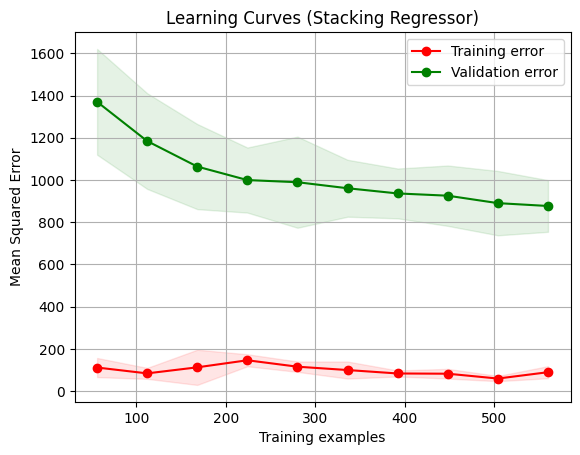

In [10]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

plt.figure()
plt.title('Learning Curves (Stacking Regressor)')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training error')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation error')

plt.legend(loc='best')
plt.show()

<div style="background-color:red; padding:10px;">
    <p style="font-size: 20px">This graph shows how the error in the model's prediction is distributed over the dataset in terms of the frequency.</p>
</div>

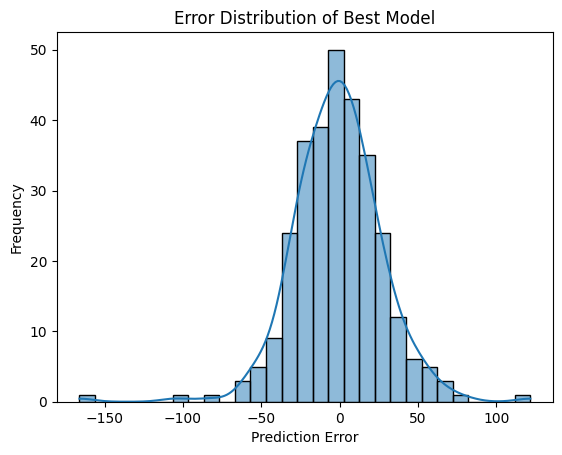

In [11]:
# Error distribution
errors = y_pred - y_test

plt.figure()
sns.histplot(errors, kde=True)
plt.title('Error Distribution of Best Model')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

<div style="background-color:red; padding:10px;">
    <p style="font-size: 20px">PCA (Principal Component Analysis) visualization is a technique used to reduce the dimensionality of data while retaining as much variance as possible, making it easier to visualize and analyze complex datasets.</p>
</div>

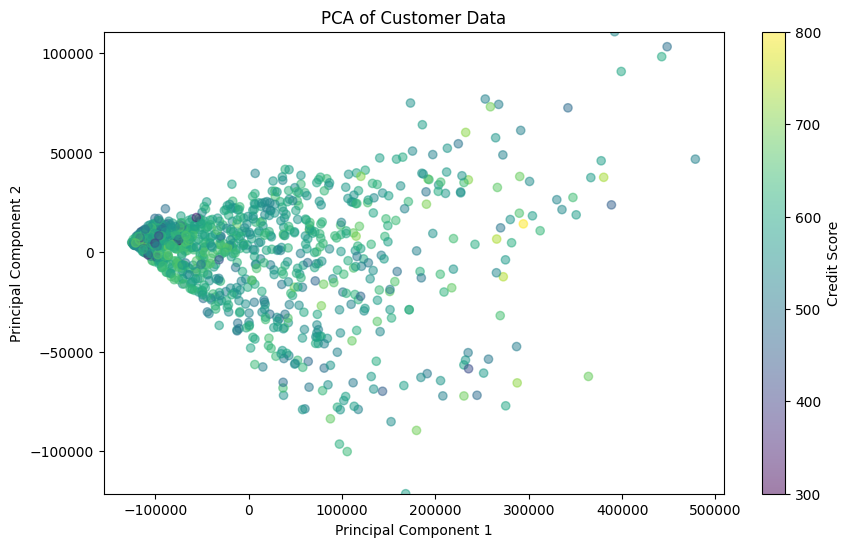

In [14]:
# Assuming X and y are already defined
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.colorbar(label='Credit Score')

# Set the y-axis limits to increase the scale
plt.ylim(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1)

plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


<div style="background-color:red; padding:10px;">
    <p style="font-size: 20px">Partial Dependence Plots (PDPs) are graphical tools used in ML to understand the relationship between a feature and the predicted outcome of a model. They help to visualize how changes in a particular feature affects the model’s predictions, while keeping other features constant.</p>
</div>

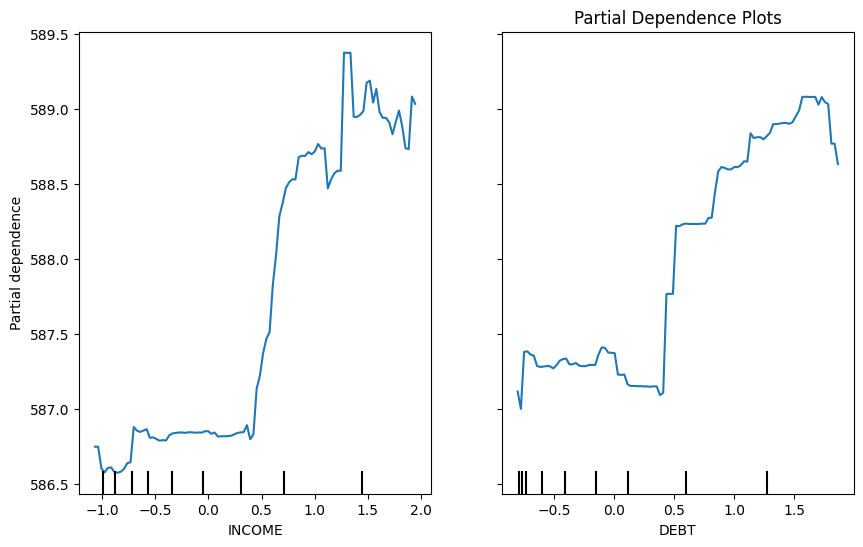

In [15]:
# Partial dependence plots
features = ['INCOME', 'DEBT']  # Example features to plot
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(best_model, X_train, features, ax=ax)
plt.title('Partial Dependence Plots')
plt.show()